In [1]:
# Import libraries
#!pip install opencv-python
import keras
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.common.image_data_format() =='th'
# from keras.layers import Merge
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import glob

Using TensorFlow backend.


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

NameError: ignored

# New Section

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
PATH = os.getcwd()
# Define data path
data_path = '/content/drive/My Drive/DICE Project/OCT_Dataset/OCT_Dataset'
 
data_dir_list = os.listdir(data_path)

img_rows=128
img_cols=128
num_channel=1
num_epoch=2
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 3
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  'A':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == 'D':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == 'N':
            labels[label_index] = 2
        label_index = label_index+1
            #print(dataset[0])


Loaded the images of dataset-NORMAL9

Loaded the images of dataset-NORMAL7

Loaded the images of dataset-NORMAL2

Loaded the images of dataset-NORMAL15

Loaded the images of dataset-NORMAL8

Loaded the images of dataset-NORMAL3

Loaded the images of dataset-NORMAL6

Loaded the images of dataset-NORMAL14

Loaded the images of dataset-NORMAL4

Loaded the images of dataset-NORMAL5

Loaded the images of dataset-NORMAL10

Loaded the images of dataset-NORMAL11

Loaded the images of dataset-DME8

Loaded the images of dataset-DME7

Loaded the images of dataset-DME6

Loaded the images of dataset-NORMAL13

Loaded the images of dataset-NORMAL12

Loaded the images of dataset-DME9

Loaded the images of dataset-DME5

Loaded the images of dataset-NORMAL1

Loaded the images of dataset-DME10

Loaded the images of dataset-DME14

Loaded the images of dataset-DME1

Loaded the images of dataset-DME12

Loaded the images of dataset-DME2

Loaded the images of dataset-DME3

Loaded the images of dataset-DME4

L

In [4]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)


# Using 'th' for the image_dim_ordering we get accuracy >=0.99 . 
# Using 'tf' for the dim order I get accuracy >= 0.9 but on more epochs
if num_channel==1:
    if K.common.image_dim_ordering()=='th':
        img_data= np.expand_dims(img_data, axis=1)
        print (img_data.shape)
    else:
        img_data= np.expand_dims(img_data, axis=4)
        print (img_data.shape)

else:
    if K.image_dim_ordering()=='th':
        img_data=np.rollaxis(img_data,3,1)
        print (img_data.shape)


        labels[0:722] = 0
        labels[723:1823] = 1
        labels[1824:3230] = 2
        
        
        X_train.shape
        

        
USE_SKLEARN_PREPROCESSING=False

if USE_SKLEARN_PREPROCESSING:
    # using sklearn for preprocessing
    from sklearn import preprocessing

    def image_to_feature_vector(image, size=(128, 128)):
        # resize the image to a fixed size, then flatten the image into
        # a list of raw pixel intensities
        return cv2.resize(image, size).flatten()

    img_data_list=[]
    for dataset in data_dir_list:
        img_list=os.listdir(data_path+'/'+ dataset)
        print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
        for img in img_list:
            input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_flatten=image_to_feature_vector(input_img,(128,128))
            img_data_list.append(input_img_flatten)

    img_data = np.array(img_data_list)
    img_data = img_data.astype('float32')
    print (img_data.shape)
    img_data_scaled = preprocessing.scale(img_data)
    print (img_data_scaled.shape)

    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)


    if K.image_dim_ordering()=='th':
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
        print (img_data_scaled.shape)

    else:
        img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
        print (img_data_scaled.shape)

if USE_SKLEARN_PREPROCESSING:
    img_data=img_data_scaled
    
    #%%
# labels[0:800]
labels[1500:2100]
#%%



(3242, 128, 128)
(3242, 128, 128, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,

In [0]:
# Assigning Labels

# Define the number of classes
num_classes = 3

names = ['AMD','DME','NORMAL']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)
x= img_data

#Shuffle the dataset with random state=2
x,y = shuffle(x, Y)
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=2)


In [0]:
# # Defining the model 
# # Feel free to use CNNs/Dense Networks

# model = Sequential()

# model.add(Convolution2D(filters= 8, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,1)))
# #model.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=train_set_x.shape[1:]  ))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Convolution2D(filters= 16, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Convolution2D(filters= 32, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Convolution2D(filters= 64, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Convolution2D(filters= 128, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(3, activation='softmax'))


# # Viewing model_configuration
# #model.get_config()
# #model.layers[0].get_config()
# #model.layers[0].input_shape
# #model.layers[0].output_shape
# #model.layers[0].output
# #model.layers[0].get_weights()
# model.summary()


In [6]:
# Defining the model 
# Feel free to use CNNs/Dense Networks

model = Sequential()

model.add(Convolution2D(filters= 8, kernel_size=2, padding='same', activation='relu'))
#model.add(Conv2D(10, kernel_size=3, activation= 'relu', input_shape=train_set_x.shape[1:]  ))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(filters= 16, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(filters= 32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(filters= 64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(filters= 128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))


# Viewing model_configuration
#model.get_config()
#model.layers[0].get_config()
#model.layers[0].input_shape
#model.layers[0].output_shape
#model.layers[0].output
#model.layers[0].get_weights()



In [7]:
learning_rate = 0.001
opt = adam(lr=learning_rate)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Train and fit wit appropiate batch size, epochs, verbose = 1 and validation set
hist = model.fit(X_train, y_train, epochs= 200, batch_size=20, verbose=True, validation_split=0.2)

# model saving 
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 2074 samples, validate on 519 samples
Epoch 1/200





2074/2074 [==============================] - 15s 7ms/step - loss: 0.5201 - acc: 0.7363 - val_loss: 0.4178 - val_acc: 0.7848
Epoch 2/200
2074/2074 [==============================] - 1s 443us/step - loss: 0.3555 - acc: 0.8356 - val_loss: 0.3524 - val_acc: 0.8349
Epoch 3/200
2074/2074 [==============================] - 1s 421us/step - loss: 0.2422 - acc: 0.8934 - val_loss: 0.2194 - val_acc: 0.9062
Epoch 4/200
2074/2074 [==============================] - 1s 413us/step - loss: 0.1281 - acc: 0.9495 - val_loss: 0.2167 - val_acc: 0.9216
Epoch 5/200
2074/2074 [==============================] - 1s 410us/step - loss: 0.0798 - acc: 0.9706 - val_loss: 0.0448 - val_acc: 0.9852
Epoch 6/200
2074/2074 [==============================] - 1s 414us/step - loss: 0.0400 - acc: 0.9859 - val_loss: 0.0232 - val_acc: 0.9917
Epoch 7/200
2074/2074 [===

In [9]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_train, y_train)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

2593/2593 [==============================] - 0s 128us/step
Test Loss: 0.0056896836066546086
Test accuracy: 0.9994857955797272


[0 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 2 2 2 2 0 1 2 1 1 0 0 0 2 2
 1 0 1 0 2 2 2 0 2 0 0 2 1 1 2 1 2 2 2 2 0 1 1 1 0 2 1 0 0 1 1 2 1 2 0 2 2
 2 0 2 1 1 1 1 1 0 0 0 2 2 2 0 1 2 2 1 2 1 1 2 0 2 0 1 2 2 2 0 2 1 2 2 1 0
 1 1 1 1 1 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1 2 0 2 1 1 2 2 1 2 2 2 2 2 2 2
 0 2 0 0 2 2 2 1 2 1 2 2 1 1 1 1 1 2 0 1 0 0 2 1 0 2 2 2 2 0 1 2 1 0 1 1 2
 1 1 0 0 2 2 1 1 2 2 2 1 1 2 1 2 2 1 2 2 1 1 0 2 2 1 0 2 1 2 2 0 1 2 1 1 2
 2 1 2 0 2 2 2 0 1 2 0 0 0 1 0 2 0 2 1 2 2 0 2 2 1 2 2 0 0 2 2 0 2 0 2 0 2
 0 2 0 2 2 2 1 0 1 1 0 2 0 2 0 1 1 2 1 0 1 2 2 1 2 2 0 2 2 2 1 0 2 2 1 2 0
 0 1 1 0 0 1 2 2 2 1 1 1 2 0 2 2 0 1 1 2 0 0 2 1 2 0 0 1 2 1 1 2 2 0 2 0 1
 1 1 1 2 2 1 0 1 1 1 2 0 2 2 2 0 2 0 1 0 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1
 2 0 2 1 1 0 1 2 1 2 1 1 1 1 0 0 2 1 0 2 1 0 1 1 1 0 1 2 0 1 0 2 0 0 2 1 2
 1 1 2 1 2 2 1 0 2 0 2 1 2 2 2 1 2 1 2 1 2 2 2 2 2 2 1 1 2 0 0 1 2 1 1 0 2
 0 1 1 0 1 0 2 1 1 1 2 2 2 1 2 0 2 1 1 2 2 1 1 1 1 1 2 2 2 2 1 1 2 1 2 1 1
 2 0 0 1 2 1 2 2 0 0 1 0 

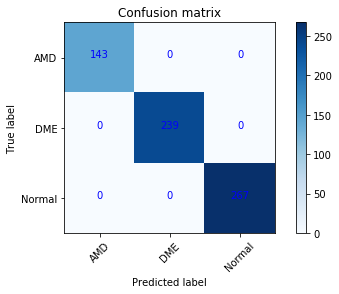

In [10]:
# Predict model on Test Data

Y_pred = model.predict_classes(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
# y_pred = y_test
# print(y_pred)

target_names = ['AMD', 'DME', 'Normal']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="blue" if cm[i, j] > thresh else "blue")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), Y_pred))

np.set_printoptions(precision=10)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()